In [53]:
# Set the base directory for the Symbol Recognition System
base_directory = r"C:\Users\user\Desktop\Symbol Recognition System_CID Juba"

# Use this base_directory to access any files or subdirectories within this project

In [54]:
import os

# Set the current working directory to the project folder of CID Finger Print Recognition System Juba
os.chdir(r"C:\Users\user\Desktop\Symbol Recognition System_CID Juba")

In [55]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

import tensorflow as tf
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
# Replace the deprecated function with the suggested one
from tensorflow.compat.v1.losses import sparse_softmax_cross_entropy

In [56]:
def data_info(direct):
    # List all files in the specified directory. Stripping to remove any leading/trailing whitespace.
    files = [file.strip() for file in os.listdir('./' + direct)]

    filenames = []  # Initialize a list to store filename and class label pairs

    for file in files:  # Iterate through each file in the directory
        # Extract the filename (minus the last 4 characters, typically the file extension)
        # and the first character of the filename, assumed to be the class label
        add = [file[:-4], file[0]]  # Create a list containing the filename and its class label

        filenames.append(add)  # Append this list to the filenames list

    return filenames  # Return the list of filename and label pairs

In [61]:
import os
import pandas as pd

# Provide the absolute path to the directory where 'train' and 'test' folders are located
# Replace 'your_absolute_path' with the actual path
absolute_path = r'C:\Users\user\Desktop\Symbol Recognition System_CID Juba\data'

# Optionally, list contents of the absolute path directory for verification
print("Contents of the directory:", os.listdir(absolute_path))

# Set the current working directory to the absolute path
os.chdir(absolute_path)

# Creating lists of filenames and labels for the training and testing datasets
df_train = data_info(direct='train')  # Extract filenames and labels from the 'train' directory
df_test = data_info(direct='test')    # Extract filenames and labels from the 'test' directory

# Creating DataFrames for the training and testing data
train = pd.DataFrame(df_train, columns=['filename', 'label']) 
test = pd.DataFrame(df_test, columns=['filename', 'label'])   

# Displaying the first few entries of both the training and testing DataFrames
display(train.head(), test.head())

Contents of the directory: ['model', 'test', 'train']


,filename,label
0,1 (1),1
1,1 (10),1
2,1 (2),1
3,1 (3),1
4,1 (4),1


,filename,label
0,1,1
1,10,1
2,11,1
3,12,1
4,13,1


In [62]:
def pixel_info(direct, df):
    pixels = []  # Initialize a list to store pixel data for each image

    # Iterating over each filename in the DataFrame
    for file in list(df['filename']):
        from PIL import Image  # Importing the Image module from Python Imaging Library (PIL)

        # Open the image file located in the specified directory
        im = Image.open('./' + direct + '/' + file + '.bmp')

        # Extract pixel values from the image and convert them to a list
        pix = list(im.getdata())

        # Append the pixel data to the pixels list
        pixels.append(pix)

    # Create a DataFrame from the pixel data
    # Assuming the images are 144x144 pixels, resulting in 144**2 columns
    df_pix = pd.DataFrame(pixels, columns=list(range(144**2)))

    return df_pix  # Return the DataFrame containing pixel data

In [63]:
# Extracting pixel data for the training dataset using the pixel_info function
# The function takes 'train' directory and the training DataFrame as inputs
# It returns a DataFrame where each row is pixel data for an image in the training set
train_pix = pixel_info('train', train)

# Extracting pixel data for the testing dataset using the pixel_info function
# The function takes 'test' directory and the testing DataFrame as inputs
# It returns a DataFrame where each row is pixel data for an image in the testing set
test_pix = pixel_info('test', test)

In [60]:
# Displaying the first few rows of the train_pix and test_pix DataFrames
# This is useful for verifying the structure and content of the pixel data
display(train_pix.head(), test_pix.head())

,0,1,2,3,4,5,6,7,8,9,...,20726,20727,20728,20729,20730,20731,20732,20733,20734,20735
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,0,1,2,3,4,5,6,7,8,9,...,20726,20727,20728,20729,20730,20731,20732,20733,20734,20735
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


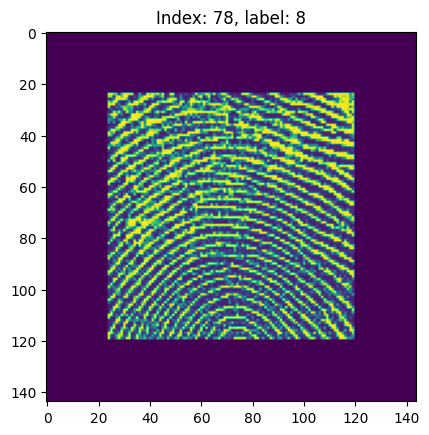

In [64]:
import matplotlib.pyplot as plt  # Ensure matplotlib.pyplot is imported for plotting

# Checking if the images have been correctly converted to pixels
idx = 78  # Setting the index of the image to be visualized

# Reshape the pixel data at the specified index into a 144x144 array and convert it to integers
# This reshaping is necessary to convert the flat pixel array back into image format
img = train_pix.loc[idx, '0':].values.reshape(144, 144).astype(int)

# Retrieve the label for the image at the specified index from the training dataset
label = train.loc[idx, 'label']

# Setting up the plot with the image and its corresponding label
plt.title('Index: %i, label: %s' % (idx, label))  # Title showing index and label
plt.imshow(img)  # Display the image
plt.show()  # Show the plot

Train-Test-Split

In [66]:
from sklearn.model_selection import train_test_split
import numpy as np

# Splitting the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_pix.values, train['label'], test_size=0.3, random_state=42, shuffle=True, stratify=None)

# Reshaping the training data to fit the model input format (number of samples, image height, image width, number of channels)
# Normalizing the pixel values by dividing by 255 (scales the values to be between 0 and 1)
X_train = X_train.reshape(-1, 144, 144, 1) / 255

# Applying the same reshaping and normalizing process to the validation data
X_val = X_val.reshape(-1, 144, 144, 1) / 255

# Preparing the test data by reshaping and normalizing
X_test = test_pix.values.reshape(-1, 144, 144, 1) / 255

# One-hot encoding the labels for the training and validation sets
# This converts categorical labels into a format suitable for classification models
# The label 'digit' is assumed to start from 1, hence 'digit-1' for zero-based indexing
y_train_vec = np.zeros((len(y_train), 8))  # Creating a zero matrix for one-hot encoded labels
for i, digit in enumerate(y_train):
    y_train_vec[i, int(digit)-1] = 1  # One-hot encode the training labels

y_val_vec = np.zeros((len(y_val), 8))  # Creating a zero matrix for one-hot encoded labels
for i, digit in enumerate(y_val):
    y_val_vec[i, int(digit)-1] = 1  # One-hot encode the validation labels

CNN Model

In [67]:
# ##Data Augmentation

# Creating a data generator for image augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False, # Do not adjust the overall dataset mean to 0
    samplewise_center=False, # Do not adjust each image's mean to 0
    featurewise_std_normalization=False, # Do not scale the dataset to have unit standard deviation
    samplewise_std_normalization=False, # Do not scale each image to have unit standard deviation
    zca_whitening=False, # Do not apply ZCA Whitening (a method to reduce redundancy in images)
    rotation_range=10, # Randomly rotate images up to 10 degrees
    width_shift_range=0.1, # Randomly shift images horizontally by up to 10% of their width
    height_shift_range=0.1, # Randomly shift images vertically by up to 10% of their height
    zoom_range=0.1, # Randomly zoom into images by up to 10%
    horizontal_flip=False, # Do not randomly flip images horizontally
    vertical_flip=True, # Allow random vertical flipping of images
)

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
# Replace the deprecated function with the suggested one
from tensorflow.compat.v1 import get_default_graph
# Replace the deprecated function with the suggested one
from tensorflow.compat.v1.nn import max_pool2d

# Setting up parameters for the CNN model
nb_classes = 8  # Number of classes for classification (8 different fingerprints)
nb_filters = 32  # Number of convolutional filters (features to detect)
pool_size = (2, 2)  # Size of the pooling area for max pooling (reduces the spatial dimensions)
kernel_size = (3, 3)  # Size of the convolution kernels (filters)

# Building the CNN model
model = Sequential([
    # First convolutional layer with specified number of filters and kernel size
    # 'valid' padding means no padding; input shape is the shape of training data
    Conv2D(nb_filters, kernel_size, padding='valid', input_shape=X_train.shape[1:], activation='relu'),

    # Second convolutional layer with same number of filters and kernel size
    Conv2D(nb_filters, kernel_size, activation='relu'),

    # Max pooling layer to reduce spatial dimensions of the output volume
    MaxPooling2D(pool_size=pool_size),

    # Dropout layer to reduce overfitting by randomly setting a fraction of input units to 0
    Dropout(0.25),

    # Flatten layer to convert 2D feature maps to 1D feature vectors
    Flatten(),

    # Fully connected layer with 128 neurons
    Dense(128, activation='relu'),

    # Another dropout layer for regularization
    Dropout(0.5),

    # Output layer with 'softmax' activation for multi-class classification
    Dense(nb_classes, activation='softmax')
])


In [69]:
# Replace the deprecated class with the suggested one
from tensorflow.compat.v1.train import Optimizer
# Compiling the CNN model
# 'categorical_crossentropy' is used as the loss function, suitable for multi-class classification
# 'adam' optimizer is chosen for efficient gradient descent
# The model will report 'accuracy' as a metric to evaluate performance during training and testing
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [70]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Setting the batch size and number of epochs for training the model
batch = 8  # The number of training examples utilized in one iteration
epoch = 10  # The number of times the learning algorithm will work through the entire training dataset

# Setting up an EarlyStopping callback to prevent overfitting
# It will stop the training if the validation loss doesn't improve after 5 epochs ('patience')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# Setting up a ModelCheckpoint callback to save the model
# This saves the model with the best performance on validation accuracy
# 'model_cnn.h5' is the file name in which the model is saved
mc = ModelCheckpoint('./model/model_cnn.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [71]:
# Option 1: Training the model with data augmentation
# Uncomment this block to use augmented data for training
# 'datagen.flow()' creates a generator that applies transformations to the images in real-time
# history = model.fit(datagen.flow(X_train, y_train_vec), 
#                     epochs=epoch, 
#                     callbacks=[es, mc],
#                     batch_size=batch,
#                     validation_data=(X_val, y_val_vec)
#                     )

# Option 2: Training the model without data augmentation
# This approach uses the original training data without any real-time augmentation
history = model.fit(X_train, y_train_vec, 
                    epochs=epoch, 
                    callbacks=[es, mc], 
                    batch_size=batch, 
                    validation_data=(X_val, y_val_vec))

Epoch 1/10
7/7 [==============================] - ETA: 0s - loss: 5.2982 - accuracy: 0.1429
Epoch 1: val_accuracy improved from -inf to 0.54167, saving model to ./model\model_cnn.h5


C:\Users\User\anaconda3\envs\symbol\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7/7 [==============================] - 7s 695ms/step - loss: 5.2982 - accuracy: 0.1429 - val_loss: 1.4911 - val_accuracy: 0.5417
Epoch 2/10
7/7 [==============================] - ETA: 0s - loss: 1.1731 - accuracy: 0.6964
Epoch 2: val_accuracy improved from 0.54167 to 1.00000, saving model to ./model\model_cnn.h5
7/7 [==============================] - 4s 676ms/step - loss: 1.1731 - accuracy: 0.6964 - val_loss: 0.4983 - val_accuracy: 1.0000
Epoch 3/10
7/7 [==============================] - ETA: 0s - loss: 0.5107 - accuracy: 0.8571
Epoch 3: val_accuracy did not improve from 1.00000
7/7 [==============================] - 3s 409ms/step - loss: 0.5107 - accuracy: 0.8571 - val_loss: 0.0910 - val_accuracy: 1.0000
Epoch 4/10
7/7 [==============================] - ETA: 0s - loss: 0.1597 - accuracy: 0.9464
Epoch 4: val_accuracy did not improve from 1.00000
7/7 [==============================] - 3s 445ms/step - loss: 0.1597 - accuracy: 0.9464 - val_loss: 0.0245 - val_accuracy: 1.0000
Epoch 5/10
7/

In [72]:
from tensorflow.keras.models import load_model

# Loading the best model saved during training
# The model is loaded from the file 'model_cnn.h5' in the 'model' directory
best = load_model('./model/model_cnn.h5')

In [44]:
import numpy as np
from sklearn.metrics import classification_report

# Making predictions on the validation dataset using the best model
# 'np.argmax' is used to convert the probabilities to class labels
val_predict = np.argmax(best.predict(X_val), axis=1)

# Evaluating the model on the validation data and printing the accuracy
# 'best.evaluate' returns the loss value and the metrics value for the model in test mode
# The index [1] is used to access the accuracy since it's the second item returned by 'evaluate'
print("\n Validation Accuracy: %.4f" % (best.evaluate(X_val, y_val_vec)[1]))

# Generating a classification report to evaluate the model's performance
# 'np.argmax(y_val_vec, axis=1)' converts the one-hot encoded true labels back to class labels
# 'classification_report' provides metrics like precision, recall, and f1-score
print(classification_report(np.argmax(y_val_vec, axis=1), val_predict))

1/1 [==============================] - 0s 87ms/step - loss: 9.0149 - accuracy: 0.7500

 Validation Accuracy: 0.7500
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.00      0.00      0.00         1

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4



C:\Users\User\anaconda3\envs\symbol\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\envs\symbol\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\envs\symbol\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [73]:
import numpy as np

# Making predictions on the test dataset using the best model
# 'np.argmax' is used to find the class label with the highest predicted probability
test_predict = np.argmax(best.predict(X_test), axis=1)

# Adjusting the predicted labels to match the label range (1-8)
# The model's output provides indices (0-7), so adding 1 adjusts them to the correct label range
true_class = [pred + 1 for pred in test_predict]

# Mapping the predicted labels onto the test DataFrame
# This assigns the predicted labels to the 'label' column in the test DataFrame
test['label'] = true_class

3/3 [==============================] - 1s 129ms/step


In [74]:
import pandas as pd

# Converting the 'filename' column in the test DataFrame to numeric values
# This is useful if the filenames are numeric but are currently read as strings
test['filename'] = pd.to_numeric(test["filename"])

# Displaying the test DataFrame
# The DataFrame now includes the predicted labels and numeric filenames
test

,filename,label
0,1,7
1,10,3
2,11,6
3,12,2
4,13,5
...,...,...
75,78,1
76,79,7
77,8,6
78,80,6


In [75]:
# Sorting the test DataFrame by the 'filename' column in ascending order
# This is useful for organizing the data in a specific order for analysis or presentation
result = test.sort_values(by=['filename'], ascending=True)

# Displaying the first few rows of the sorted DataFrame
# This provides a quick view of the top entries in the sorted dataset
result.head()

,filename,label
0,1,7
11,2,3
22,3,2
33,4,6
44,5,1


In [76]:
import os

# Define the directory path where the file will be saved
directory = r'C:\Users\user\Desktop\Symbol Recognition System_CID Juba\result'

# Check if the directory exists, and create it if it does not
if not os.path.exists(directory):
    os.makedirs(directory)

# Define the full file path
file_path = os.path.join(directory, 'result_cnn.csv')

# Save the DataFrame to the CSV file in the specified directory
result.to_csv(file_path, index=False)

In [51]:
import pandas as pd

# Define the full path of the CSV file
file_path = r'C:\Users\user\Desktop\Symbol Recognition System_CID Juba\result\result_cnn.csv'

# Loading the data from the CSV file
result = pd.read_csv(file_path)

# Displaying the first few rows of the DataFrame
result.head()

,filename,label
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


In [77]:
from collections import Counter

# Counting the number of occurrences for each class in the 'label' column of the result DataFrame
# This helps in understanding the distribution of different classes in the dataset
class_distribution = Counter(result['label'])

# Displaying the count of each class
class_distribution

Counter({3: 19, 6: 18, 8: 12, 2: 10, 5: 10, 7: 5, 1: 3, 4: 3})